In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib notebook

In [2]:
auto = pd.read_csv("Auto.csv")

In [3]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'],errors='coerce') 

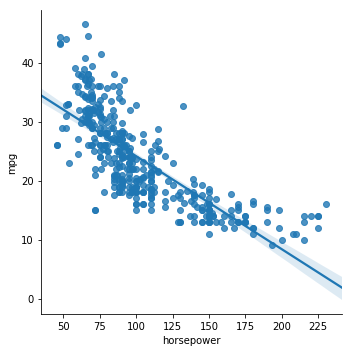

In [5]:
plot = sns.lmplot(x ='horsepower', y ='mpg', data = auto)

In [6]:
model = LinearRegression()

In [7]:
horsepower = auto['horsepower'].values.reshape(-1,1)
mpg = auto['mpg'].values.reshape(-1,1)
for i in range(390):
    if np.isnan(horsepower[i]):
        horsepower = np.delete(horsepower, i)
        mpg = np.delete(mpg, i)
        
        


In [8]:
X = horsepower = horsepower.reshape(-1,1)
y = mpg = mpg.reshape(-1,1)

In [9]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

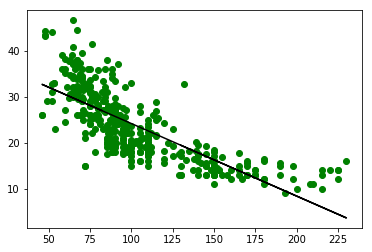

In [10]:
plt.scatter(X, y,color='g')
plt.plot(X, model.predict(X),color='k')

plt.show()

In [11]:
model.coef_

array([[-0.15784473]])

In [12]:
model.rank_

1

In [13]:
model.intercept_

array([39.93586102])

In [14]:
model.predict([[98]])

array([[24.46707715]])

In [15]:
stdev = np.sqrt(sum((model.predict(X) - y)**2) / (len(y)))

In [16]:
stdev


array([4.89322623])

In [17]:
upperConfidenceInterval = model.predict(X) + 1.96*stdev

In [18]:
upperConfidenceInterval

array([[29.0067691 ],
       [23.48220343],
       [25.84987443],
       [25.84987443],
       [27.42832176],
       [18.27332723],
       [14.80074309],
       [15.58996676],
       [14.01151943],
       [19.53608509],
       [22.69297976],
       [24.2714271 ],
       [25.84987443],
       [14.01151943],
       [34.53133476],
       [34.53133476],
       [34.2156453 ],
       [36.1097821 ],
       [35.6362479 ],
       [42.2657267 ],
       [35.79409263],
       [35.32055843],
       [34.53133476],
       [31.69012956],
       [35.32055843],
       [15.58996676],
       [17.95763776],
       [16.37919043],
       [19.06255089],
       [35.6362479 ],
       [35.32055843],
       [34.53133476],
       [33.7421111 ],
       [32.95288743],
       [33.7421111 ],
       [35.6362479 ],
       [33.7421111 ],
       [23.48220343],
       [21.9037561 ],
       [25.37634023],
       [25.84987443],
       [21.11453243],
       [22.69297976],
       [21.9037561 ],
       [32.16366376],
       [38

In [19]:
lowerConfidenceInterval = model.predict(X) - 1.96*stdev

In [20]:
lowerConfidenceInterval

array([[ 9.82532227],
       [ 4.30075661],
       [ 6.66842761],
       [ 6.66842761],
       [ 8.24687494],
       [-0.90811959],
       [-4.38070373],
       [-3.59148006],
       [-5.16992739],
       [ 0.35463827],
       [ 3.51153294],
       [ 5.08998027],
       [ 6.66842761],
       [-5.16992739],
       [15.34988794],
       [15.34988794],
       [15.03419847],
       [16.92833528],
       [16.45480108],
       [23.08427988],
       [16.61264581],
       [16.13911161],
       [15.34988794],
       [12.50868274],
       [16.13911161],
       [-3.59148006],
       [-1.22380906],
       [-2.80225639],
       [-0.11889593],
       [16.45480108],
       [16.13911161],
       [15.34988794],
       [14.56066427],
       [13.77144061],
       [14.56066427],
       [16.45480108],
       [14.56066427],
       [ 4.30075661],
       [ 2.72230927],
       [ 6.19489341],
       [ 6.66842761],
       [ 1.93308561],
       [ 3.51153294],
       [ 2.72230927],
       [12.98221694],
       [18

Creating confidence interval for linear regression created with 

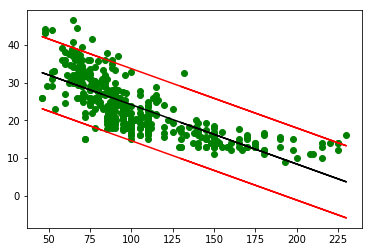

In [21]:
plt.scatter(X, y,color='g')
plt.plot(X, model.predict(X),color='k')
plt.plot(X,upperConfidenceInterval, color='r')
plt.plot(X,lowerConfidenceInterval, color='r')
plt.show()

<Head>MultiLinear regression with seaborn (PAIRPLOT)</Head>


C:\Users\macie\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\macie\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


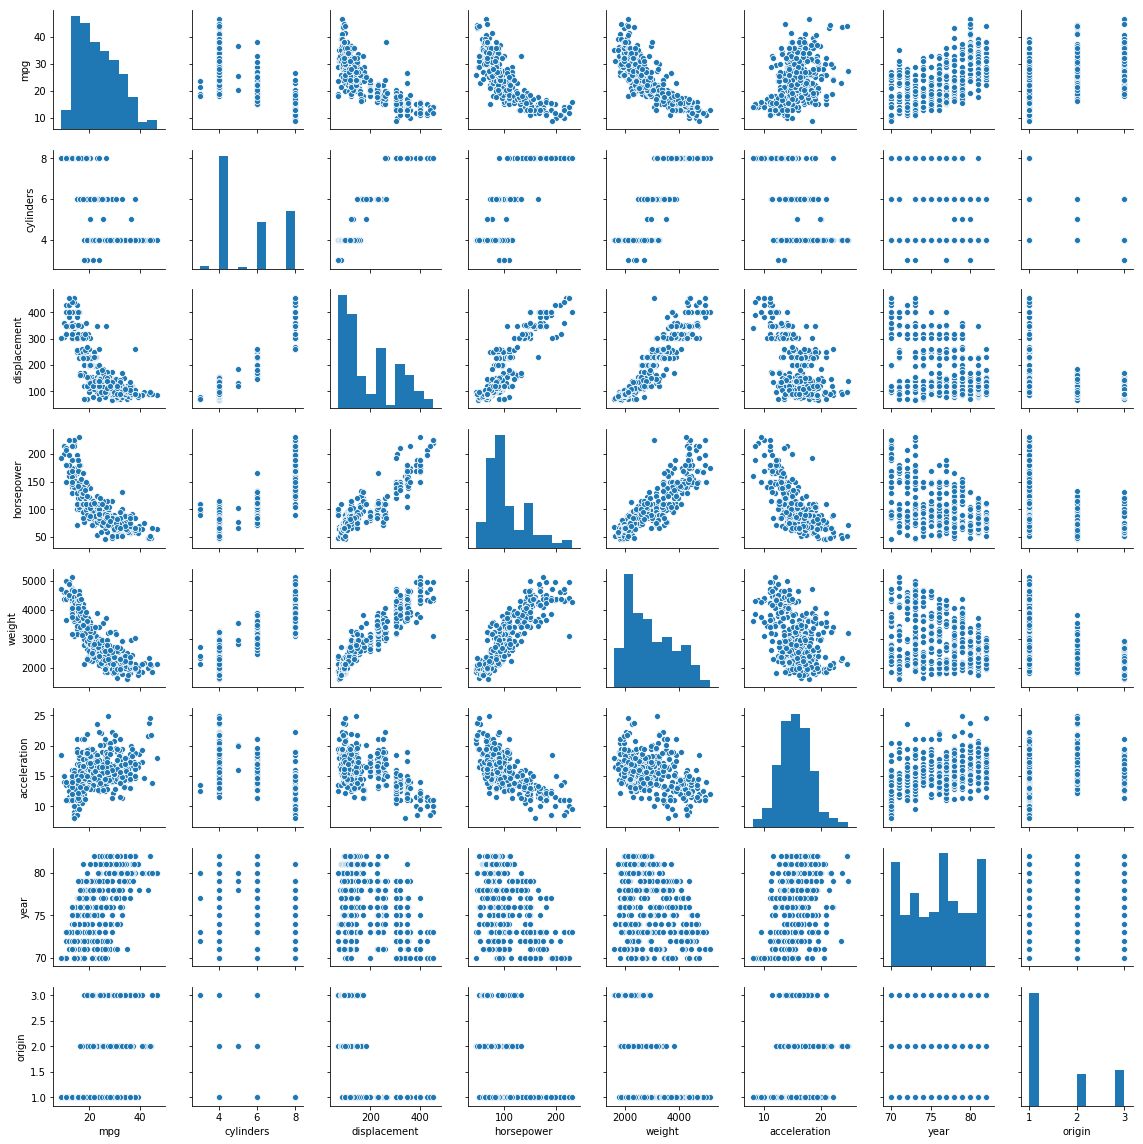

In [22]:
sns.pairplot(auto, height=2)

Different methods for creating correlation matrix


In [23]:
#Pearson: Standard correlation coefficient
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


In [24]:
#Kendall : Kendall Tau correlation coeficient
auto.corr(method='kendall')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.686991,-0.679390,-0.679166,-0.693780,0.302314,0.415291,0.467514
cylinders,-0.686991,1.000000,0.795435,0.686146,0.736697,-0.365970,-0.271915,-0.553858
displacement,-0.679390,0.795435,1.000000,0.718471,0.800536,-0.353772,-0.219891,-0.570185
horsepower,-0.679166,0.686146,0.718471,1.000000,0.703730,-0.488239,-0.277831,-0.406024
weight,-0.693780,0.736697,0.800536,0.703730,1.000000,-0.270797,-0.198401,-0.496076
acceleration,0.302314,-0.365970,-0.353772,-0.488239,-0.270797,1.000000,0.192570,0.176040
year,0.415291,-0.271915,-0.219891,-0.277831,-0.198401,0.192570,1.000000,0.140037
origin,0.467514,-0.553858,-0.570185,-0.406024,-0.496076,0.176040,0.140037,1.000000


In [25]:
#Spearman: Spearman rank correlation
auto.corr(method='spearman')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.822452,-0.855458,-0.853616,-0.874852,0.440265,0.575426,0.581035
cylinders,-0.822452,1.000000,0.912416,0.816188,0.874516,-0.473030,-0.332879,-0.607116
displacement,-0.855458,0.912416,1.000000,0.876171,0.945980,-0.498615,-0.306426,-0.707372
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498,-0.508989
weight,-0.874852,0.874516,0.945980,0.878819,1.000000,-0.407367,-0.279003,-0.628290
acceleration,0.440265,-0.473030,-0.498615,-0.658142,-0.407367,1.000000,0.270111,0.224432
year,0.575426,-0.332879,-0.306426,-0.389498,-0.279003,0.270111,1.000000,0.170387
origin,0.581035,-0.607116,-0.707372,-0.508989,-0.628290,0.224432,0.170387,1.000000


In [26]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'],errors='coerce') 
auto = auto.dropna(axis = 0)
dfWithoutY = auto.drop(labels = ['mpg','name'],axis = 1)
dfWithoutY.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [27]:
dfWithoutY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 7 columns):
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
dtypes: float64(3), int64(4)
memory usage: 24.5 KB


Check for NaN

In [28]:

counter = 0
for i in dfWithoutY['horsepower']:
    if pd.isna(i):
        print(i)
        print(counter)
    counter = counter +1


In [29]:
multipleRegression = LinearRegression()
multipleRegression.fit(X = dfWithoutY,y = auto['mpg'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
multipleRegression.coef_

array([-0.49337632,  0.01989564, -0.01695114, -0.00647404,  0.08057584,
        0.75077268,  1.4261405 ])

In [31]:
 multipleRegression.intercept_

-17.218434622017522

In [32]:
multipleRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [34]:
multipleRegression.singular_

array([1.69195539e+04, 7.69391357e+02, 3.19604037e+02, 6.55003769e+01,
       3.35498247e+01, 1.21731730e+01, 1.01628723e+01])

In [37]:
import statsmodels.api as sm

Make predictions and summary like in R-language

In [41]:
X = dfWithoutY
y = auto['mpg']


model = sm.OLS(y, X, missing='drop').fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2933.
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:29:45   Log-Likelihood:                -1030.4
No. Observations:                 392   AIC:                             2075.
Df Residuals:                     385   BIC:                             2103.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.7055      0.323     -2.181      0.030      -1.341      -0.070
displacement     0.0219      0.008      2.871      0.004       0.007       0.037
horsepower      -0.0396      0.013     -3.147      0.002      -0.064      -0.015
weight          -0.0060      0.001     -9.258      0.000      -0.007      -0.005
acceleration    -0.0796      0.090     -0.881      0.379      -0.257       0.098
year             0.5836      0.024     24.150      0.000       0.536       0.631
origin           1.3100      0.281      4.663      0.000       0.758       1.862
==============================================================================
Omnibus:                       46.837   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.015
Skew:                           0.681   Prob(JB):                     2.84e-20
Kurtosis:                       4.912   Cond. No.                     6.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
X = auto['horsepower']
y = auto['mpg']


model = sm.OLS(y, X, missing='drop').fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     723.7
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           5.67e-91
Time:                        16:32:17   Log-Likelihood:                -1608.1
No. Observations:                 392   AIC:                             3218.
Df Residuals:                     391   BIC:                             3222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower     0.1788      0.007     26.901      0.000       0.166       0.192
==============================================================================
Omnibus:                       13.847   Durbin-Watson:                   0.471
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.780
Skew:                          -0.268   Prob(JB):                      0.00752
Kurtosis:                       2.442   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
from statsmodels.graphics.gofplots import ProbPlot

def diagnostic_plots(X, y, model_fit=None):
  """
  Function to reproduce the 4 base plots of an OLS model in R.

  ---
  Inputs:

  X: A numpy array or pandas dataframe of the features to use in building the linear regression model

  y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

  model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
  """

  if not model_fit:
      model_fit = sm.OLS(y, sm.add_constant(X)).fit()

  # create dataframe from X, y for easier plot handling
  dataframe = pd.concat([X, y], axis=1)

  # model values
  model_fitted_y = model_fit.fittedvalues
  # model residuals
  model_residuals = model_fit.resid
  # normalized residuals
  model_norm_residuals = model_fit.get_influence().resid_studentized_internal
  # absolute squared normalized residuals
  model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
  # absolute residuals
  model_abs_resid = np.abs(model_residuals)
  # leverage, from statsmodels internals
  model_leverage = model_fit.get_influence().hat_matrix_diag
  # cook's distance, from statsmodels internals
  model_cooks = model_fit.get_influence().cooks_distance[0]

  plot_lm_1 = plt.figure()
  plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

  plot_lm_1.axes[0].set_title('Residuals vs Fitted')
  plot_lm_1.axes[0].set_xlabel('Fitted values')
  plot_lm_1.axes[0].set_ylabel('Residuals');

  # annotations
  abs_resid = model_abs_resid.sort_values(ascending=False)
  abs_resid_top_3 = abs_resid[:3]
  for i in abs_resid_top_3.index:
      plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

  QQ = ProbPlot(model_norm_residuals)
  plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
  plot_lm_2.axes[0].set_title('Normal Q-Q')
  plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
  plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
  # annotations
  abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
  abs_norm_resid_top_3 = abs_norm_resid[:3]
  for r, i in enumerate(abs_norm_resid_top_3):
      plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

  plot_lm_3 = plt.figure()
  plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
  sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_3.axes[0].set_title('Scale-Location')
  plot_lm_3.axes[0].set_xlabel('Fitted values')
  plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
  abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
  abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
  for i in abs_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));


  plot_lm_4 = plt.figure();
  plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
  sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
  plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
  plot_lm_4.axes[0].set_ylim(-3, 5)
  plot_lm_4.axes[0].set_title('Residuals vs Leverage')
  plot_lm_4.axes[0].set_xlabel('Leverage')
  plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
  leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
  for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

  p = len(model_fit.params) # number of model parameters
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
  plot_lm_4.legend(loc='upper right');

NameError: name 'graph' is not defined

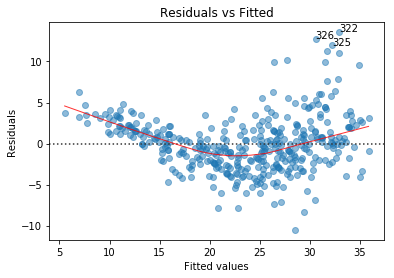

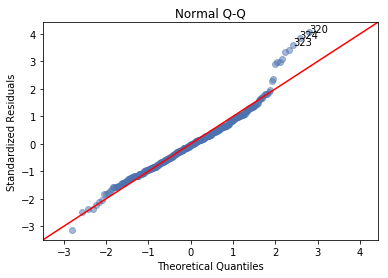

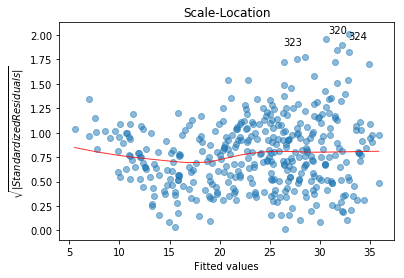

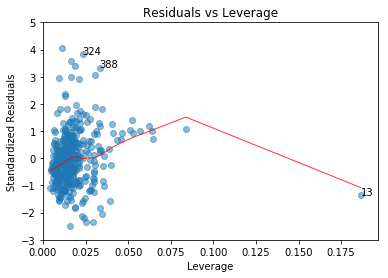

In [46]:
X = dfWithoutY
y = auto['mpg']

model = sm.OLS(y, X, missing='drop').fit()

diagnostic_plots(X,y,model)